# <font color='Blue'>K-Means Clustering for the Market Ressearch Data on Electronics Purchases</font>

# <font color='Blue'>Loading Libraries</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

## <font color='Blue'>1.0 Loading Data</font>

In [3]:
mktres = pd.read_csv( "research_data.csv" )
# Parking data in another dataframe
data = mktres
data.head(10)

,ID,Gender,Marital_Status,Annual_Income,Age,Monthly_Electronics_Spend,Purchasing_Frequency,Technology_Adoption,Viewing_hours_day
0,1,male,married,49,30,35,13,late,2
1,2,male,single,46,36,35,26,late,10
2,3,male,married,58,66,64,13,early,0
3,4,male,married,51,78,33,22,late,5
4,5,female,single,46,52,45,47,late,2
5,6,female,married,31,72,14,32,early,1
6,7,male,married,33,62,18,41,early,0
7,8,male,married,29,30,23,9,early,1
8,9,male,married,57,60,74,1,early,0
9,10,female,married,30,59,16,25,early,0


## <font color='Blue'>1.1 Get the column names</font>

In [4]:
columns = list(data.columns) 
print(columns)
print("")

['ID', 'Gender', 'Marital_Status', 'Annual_Income', 'Age', 'Monthly_Electronics_Spend', 'Purchasing_Frequency', 'Technology_Adoption', 'Viewing_hours_day']



## <font color='Blue'>1.2 Adding derived data</font>

In [6]:
data['Annual_Electronics_Spend'] = data['Monthly_Electronics_Spend']*12
# Number of raws and columns
print("#Rows and #Columns",data.shape)
print("")

#Rows and #Columns (1000, 10)



## <font color='Blue'>1.3 Drop columns not need for clustering</font>

In [8]:
data = data.drop(['ID','Monthly_Electronics_Spend'],axis=1)
print("#Rows and #Columns",data.shape)
print("")
columns = list(data.columns) 
print(columns)

#Rows and #Columns (1000, 8)

['Gender', 'Marital_Status', 'Annual_Income', 'Age', 'Purchasing_Frequency', 'Technology_Adoption', 'Viewing_hours_day', 'Annual_Electronics_Spend']


## <font color='Blue'>1.4 Dummy Coding Variables</font>

In [10]:
dummy      = ['Gender', 'Marital_Status', 'Technology_Adoption']
dummydata  = pd.get_dummies(data, columns=dummy)
dummydata.head()

#Columns
print("#Rows and #Columns",dummydata.shape)
print("")
columns = list(dummydata.columns) 
print(columns)

#Rows and #Columns (1000, 11)

['Annual_Income', 'Age', 'Purchasing_Frequency', 'Viewing_hours_day', 'Annual_Electronics_Spend', 'Gender_female', 'Gender_male', 'Marital_Status_married', 'Marital_Status_single', 'Technology_Adoption_early', 'Technology_Adoption_late']


## <font color='Blue'>1.5 Examining Data</font>

In [11]:
dummydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Annual_Income              1000 non-null   int64
 1   Age                        1000 non-null   int64
 2   Purchasing_Frequency       1000 non-null   int64
 3   Viewing_hours_day          1000 non-null   int64
 4   Annual_Electronics_Spend   1000 non-null   int64
 5   Gender_female              1000 non-null   uint8
 6   Gender_male                1000 non-null   uint8
 7   Marital_Status_married     1000 non-null   uint8
 8   Marital_Status_single      1000 non-null   uint8
 9   Technology_Adoption_early  1000 non-null   uint8
 10  Technology_Adoption_late   1000 non-null   uint8
dtypes: int64(5), uint8(6)
memory usage: 45.0 KB


In [14]:
dummydata.head()

,Annual_Income,Age,Purchasing_Frequency,Viewing_hours_day,Annual_Electronics_Spend,Gender_female,Gender_male,Marital_Status_married,Marital_Status_single,Technology_Adoption_early,Technology_Adoption_late
0,0.322666,-1.027302,-0.719876,2,0.236954,0,1,1,0,0,1
1,0.225798,-0.691290,0.217275,10,0.236954,0,1,0,1,0,1
2,0.613268,0.988773,-0.719876,0,1.938706,0,1,1,0,1,0
3,0.387244,1.660798,-0.071079,5,0.119592,0,1,1,0,0,1
4,0.225798,0.204744,1.731134,2,0.823765,1,0,0,1,0,1


## <font color='Blue'>1.6 Normalizing Non-Categorical Variables</font>

In [15]:
scaler = StandardScaler()
dummydata[["Annual_Income"]]               = scaler.fit_transform(dummydata[["Annual_Income"]])
dummydata[["Age"]]                         = scaler.fit_transform(dummydata[["Age"]])
dummydata[["Purchasing_Frequency"]]        = scaler.fit_transform(dummydata[["Purchasing_Frequency"]])
dummydata[["Viewing_hours_day"]]           = scaler.fit_transform(dummydata[["Viewing_hours_day"]])
dummydata.head()

,Annual_Income,Age,Purchasing_Frequency,Viewing_hours_day,Annual_Electronics_Spend,Gender_female,Gender_male,Marital_Status_married,Marital_Status_single,Technology_Adoption_early,Technology_Adoption_late
0,0.322666,-1.027302,-0.719876,-0.127200,0.236954,0,1,1,0,0,1
1,0.225798,-0.691290,0.217275,2.623078,0.236954,0,1,0,1,0,1
2,0.613268,0.988773,-0.719876,-0.814770,1.938706,0,1,1,0,1,0
3,0.387244,1.660798,-0.071079,0.904154,0.119592,0,1,1,0,0,1
4,0.225798,0.204744,1.731134,-0.127200,0.823765,1,0,0,1,0,1


## <font color='Blue'>2.0 Generating k-means Solutions</font>

###  <font color='Blue'>2.1 Generate 3 cluster and 4 cluster solution using k-means</font>

In [16]:
clusterid3 = KMeans(3).fit(dummydata).labels_
clusterid4 = KMeans(4).fit(dummydata).labels_

###  <font color='Blue'>2.2 Assign Cluster Labels</font>

In [17]:
data["clusterid3"] = clusterid3
data["clusterid4"] = clusterid4
cluster_size3 = data.groupby(['clusterid3']).size() 
cluster_size4 = data.groupby(['clusterid4']).size() 
print(cluster_size3)
print("")
print(cluster_size4)
print("")

clusterid3
0    172
1    656
2    172
dtype: int64

clusterid4
0      2
1    655
2    170
3    173
dtype: int64



###  <font color='Blue'>2.3 Scree Plot</font>

In [18]:
import collections 
def CountFrequency(arr): 
    return collections.Counter(arr)

Counter({0: 1000})
Counter({0: 643, 1: 357})
Counter({1: 658, 2: 171, 0: 171})
Counter({0: 654, 1: 174, 2: 170, 3: 2})
Counter({0: 353, 4: 322, 1: 163, 2: 160, 3: 2})
Counter({1: 260, 5: 245, 0: 174, 3: 171, 2: 148, 4: 2})
Counter({2: 245, 4: 233, 0: 163, 6: 160, 1: 112, 5: 85, 3: 2})
Counter({5: 215, 4: 158, 3: 145, 1: 144, 7: 139, 6: 112, 0: 85, 2: 2})
Counter({4: 168, 2: 152, 0: 142, 3: 133, 8: 123, 5: 111, 1: 85, 7: 84, 6: 2})
Counter({4: 152, 0: 144, 6: 128, 5: 118, 1: 113, 2: 111, 8: 85, 7: 84, 9: 63, 3: 2})
cluster_errors: [6220.750000000013, 5008.900646166026, 4162.263574642833, 3336.563277423576, 2712.3657054227374, 2398.713985885348, 2130.1230610368602, 1941.777131261181, 1813.575540837162, 1711.045851616866]


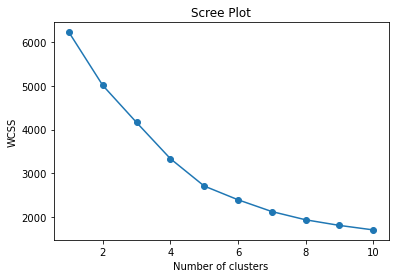

In [19]:
cluster_range = range( 1, 11 )
cluster_errors = []  # Captures WSS

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( dummydata )
    cluster_errors.append( clusters.inertia_ )
    print(CountFrequency(clusters.labels_))
   
print("cluster_errors:", cluster_errors)
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.xlabel('Number of clusters');
plt.ylabel('WCSS');
plt.title( "Scree Plot");

    1. Scree-plot indicates a four cluster solution.
    2. Size wise = cluster solutions containing either 3 or 4 clusters look good 

###  <font color='Blue'>2.4 Performance Measure: Silhouette Score</font>

In [20]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(dummydata, clusterid3))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(dummydata, clusterid4))
# Silhouette score between -1 and 1

Silhouette Coefficient: 0.301
Silhouette Coefficient: 0.292


###  <font color='Blue'>2.5 Performance Measure: Calinski-Harabasz index</font>

In [21]:
print("Calinski-Harabasz index: %0.3f"% metrics.calinski_harabasz_score(dummydata, clusterid3))
print("Calinski-Harabasz index: %0.3f"% metrics.calinski_harabasz_score(dummydata, clusterid4))

Calinski-Harabasz index: 246.535
Calinski-Harabasz index: 286.981


###  <font color='Blue'>3.0 Examining Chararcteristics</font>

In [22]:
values=['Annual_Income','Age','Purchasing_Frequency','Viewing_hours_day','Annual_Electronics_Spend','Electronic_Spend_Perc']
index =['clusterid4']
aggfunc={'Annual_Income': np.mean,
         'Age': np.mean,
         'Purchasing_Frequency':np.mean,
         'Viewing_hours_day':np.mean,
         'Annual_Electronics_Spend':np.mean,
         'Electronic_Spend_Perc':np.mean}
result = pd.pivot_table(data,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size4
result = result.round(2)
result

KeyError: 'Electronic_Spend_Perc'

###  <font color='Blue'>3.1 Examining Chararcteristics - Cont'd</font>

In [24]:
dummydata['clusterid4'] = clusterid4
values=['Gender_female','Gender_male','Marital_Status_married','Marital_Status_single']
index =['clusterid4']
aggfunc={'Gender_female': np.mean,
         'Gender_male': np.mean,
         'Marital_Status_married':np.mean,
         'Marital_Status_single':np.mean
        }
result = pd.pivot_table(dummydata,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size4
result = result.round(2)
result

,Gender_female,Gender_male,Marital_Status_married,Marital_Status_single,cluster_size
clusterid4,,,,,
0,0.00,1.00,1.00,0.00,2
1,0.49,0.51,0.66,0.34,655
2,0.28,0.72,0.79,0.21,170
3,0.55,0.45,0.88,0.12,173


###  <font color='Blue'>3.3 Examining Chararcteristics - Cont'd</font>

In [27]:
# Cluster 4 - Examining Characteristics
dummydata['clusterid4'] = clusterid4
values=['Technology_Adoption_early','Technology_Adoption_late']
index =['clusterid4']
aggfunc={'Technology_Adoption_early': np.mean,
         'Technology_Adoption_late': np.mean}
result = pd.pivot_table(dummydata,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size4
result = result.round(2)
result

,Technology_Adoption_early,Technology_Adoption_late,cluster_size
clusterid4,,,
0,1.00,0.00,2
1,0.97,0.03,655
2,0.94,0.06,170
3,0.01,0.99,173
